In [62]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [63]:
boston_train = pd.read_csv('boston_train.csv') # ,sep=';')
boston_test = pd.read_csv('boston_test.csv') # ,sep=';'

In [64]:
#df = pd.read_csv('winequality-red.csv') # ,sep=';')
#df.shape
#df.columns
#df['quality'] = df['quality'].astype(int)
#df.head()
#df['quality'].hist()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

#Y = df['quality']
#X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']]
boston_train.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [66]:
boston_train.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
1,137,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4
2,330,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6
3,368,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
4,460,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,20.0


In [67]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

Y_train = boston_train["medv"]
X_train = boston_train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]


Y_test = boston_test["medv"]
X_test = boston_test[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


chas_train = X_train["chas"] #binary
nox_train = X_train["nox"] #all below 1
X_train.drop(['chas'], axis= 1, inplace = True)
X_train.drop(['nox'], axis= 1, inplace = True)


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ('crim', 'zn', 'indus', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'))


X_train["chas"] = chas_train
X_train["nox"] = nox_train
display(X_train)
#####################

chas_test = X_test["chas"] #binary
nox_test = X_test["nox"] #all below 1
X_test.drop(['chas'], axis= 1, inplace = True)
X_test.drop(['nox'], axis= 1, inplace = True)



scaler = preprocessing.StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ('crim', 'zn', 'indus', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'))

X_test["chas"] = chas_test
X_test["nox"] = nox_test

display(X_test)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,chas,nox
0,-0.459423,-0.474769,2.413714,-1.624103,1.027678,-0.905793,-0.658896,1.730118,0.734510,-0.430650,2.273768,0,0.609
1,-0.443942,-0.474769,1.552783,-0.414486,0.867877,-0.839444,-0.658896,0.125912,1.258760,0.236317,0.518195,0,0.624
2,-0.478271,-0.474769,-1.191894,0.142593,-1.841641,0.653835,-0.658896,0.084929,-0.790580,0.202422,-0.795050,0,0.460
3,1.330224,-0.474769,0.995018,-3.376550,1.098701,-1.049249,1.599417,1.466654,0.782169,-2.515728,0.027789,0,0.631
4,0.426844,-0.474769,0.995018,-0.216445,0.544724,-0.494321,1.599417,1.466654,0.782169,0.444256,0.215984,0,0.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.480088,-0.474769,0.379857,0.450340,-0.641356,0.996751,-0.658896,-0.740594,-1.219511,0.399100,-0.788182,0,0.437
336,-0.484546,3.224560,-1.559813,0.213830,-1.184680,2.480604,-0.884727,-0.600079,-0.599943,0.444256,-1.010719,0,0.410
337,-0.484667,3.006953,-1.409702,-0.004157,-1.333828,2.435360,-0.997643,-1.021622,-0.171012,-0.172314,-0.027159,0,0.385
338,0.460346,-0.474769,0.995018,-0.185101,0.569582,-0.814201,1.599417,1.466654,0.782169,-3.952906,1.395982,0,0.614



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,chas,nox
0,-0.338971,0.238507,-1.209827,0.267295,-0.084959,0.148715,-0.955331,-0.600073,-1.294179,0.435184,-0.996844,0,0.538
1,-0.336985,-0.514036,-0.525304,0.044114,0.404068,0.598608,-0.835373,-0.932852,-0.195173,0.435184,-0.377991,0,0.469
2,-0.336987,-0.514036,-0.525304,1.151323,-0.231311,0.598608,-0.835373,-0.932852,-0.195173,0.391990,-1.138168,0,0.469
3,-0.333036,-0.514036,-1.228522,1.096252,-0.477609,1.160320,-0.715414,-1.056104,0.200469,0.435184,-0.944777,0,0.458
4,-0.336745,-0.514036,-1.228522,0.057157,-0.316980,1.160320,-0.715414,-1.056104,0.200469,0.405680,-0.962628,0,0.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.008013,-0.514036,1.060891,-0.113852,-0.559709,0.098294,1.803711,1.680085,0.859873,0.347310,-0.163773,0,0.583
162,-0.329565,-0.514036,2.447195,-0.590647,1.114407,-0.990970,-0.595456,1.957401,0.815913,0.363123,0.950459,0,0.609
163,-0.312169,-0.514036,-0.148529,-1.450038,0.189895,-0.513686,-0.355539,-0.014627,0.420271,0.435184,1.407160,0,0.585
164,-0.333643,-0.514036,0.173600,0.293381,0.054253,-0.677824,-0.955331,-0.741812,1.211555,0.383075,-0.299147,0,0.573


In [68]:
X_test.shape


(166, 13)

In [69]:
X_test.mean()


crim       4.280378e-17
zn         5.885520e-17
indus      1.284113e-16
rm        -5.243463e-16
age        1.284113e-16
dis       -4.333883e-16
rad        4.280378e-17
tax        0.000000e+00
ptratio   -4.708416e-16
black     -2.354208e-16
lstat      4.280378e-17
chas       7.228916e-02
nox        5.460898e-01
dtype: float64

In [70]:
X_test.iloc[10,:]


crim      -0.221132
zn        -0.514036
indus     -0.371430
rm        -1.189178
age        1.089420
dis       -0.001113
rad       -0.595456
tax       -0.532284
ptratio    1.211555
black      0.219427
lstat      1.389308
chas       0.000000
nox        0.538000
Name: 10, dtype: float64

In [71]:
#rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
#rf.fit(X_train, Y_train)  
#print(rf.feature_importances_)
#
#importances = rf.feature_importances_
#indices = np.argsort(importances)
#
#features = X_train.columns
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

In [72]:
X_test[0:1]


,crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,chas,nox
0,-0.338971,0.238507,-1.209827,0.267295,-0.084959,0.148715,-0.955331,-0.600073,-1.294179,0.435184,-0.996844,0,0.538


In [73]:
#import shap
#shap.initjs()
#rf_explainer = shap.KernelExplainer(rf.predict, X_test)
#rf_shap_values = rf_explainer.shap_values(X_test)

In [74]:
#rf_explainer(X_test)


In [75]:
#rf_shap_values


In [76]:
#rf_explainer.expected_value


In [77]:
#X_test.iloc[10,:] , rf_shap_values[10,:]

In [78]:
#shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")


In [79]:
#shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)


In [80]:
#shap.summary_plot(rf_shap_values, X_test, plot_type="bar")


In [81]:
#shap.summary_plot(rf_shap_values, X_test)


In [82]:
#shap.dependence_plot("alcohol", rf_shap_values, X_test)


In [83]:
X_train


,crim,zn,indus,rm,age,dis,rad,tax,ptratio,black,lstat,chas,nox
0,-0.459423,-0.474769,2.413714,-1.624103,1.027678,-0.905793,-0.658896,1.730118,0.734510,-0.430650,2.273768,0,0.609
1,-0.443942,-0.474769,1.552783,-0.414486,0.867877,-0.839444,-0.658896,0.125912,1.258760,0.236317,0.518195,0,0.624
2,-0.478271,-0.474769,-1.191894,0.142593,-1.841641,0.653835,-0.658896,0.084929,-0.790580,0.202422,-0.795050,0,0.460
3,1.330224,-0.474769,0.995018,-3.376550,1.098701,-1.049249,1.599417,1.466654,0.782169,-2.515728,0.027789,0,0.631
4,0.426844,-0.474769,0.995018,-0.216445,0.544724,-0.494321,1.599417,1.466654,0.782169,0.444256,0.215984,0,0.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.480088,-0.474769,0.379857,0.450340,-0.641356,0.996751,-0.658896,-0.740594,-1.219511,0.399100,-0.788182,0,0.437
336,-0.484546,3.224560,-1.559813,0.213830,-1.184680,2.480604,-0.884727,-0.600079,-0.599943,0.444256,-1.010719,0,0.410
337,-0.484667,3.006953,-1.409702,-0.004157,-1.333828,2.435360,-0.997643,-1.021622,-0.171012,-0.172314,-0.027159,0,0.385
338,0.460346,-0.474769,0.995018,-0.185101,0.569582,-0.814201,1.599417,1.466654,0.782169,-3.952906,1.395982,0,0.614


In [84]:
from sklearn import svm
svm = svm.LinearSVR(C = 10, max_iter = 5000)
svm.fit(X_train, Y_train)  

sum(((Y_test - svm.predict(X_test))**2))/len(Y_test)

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


26.27047349734224

In [85]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

Using 166 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 166/166 [02:33<00:00,  1.08it/s]


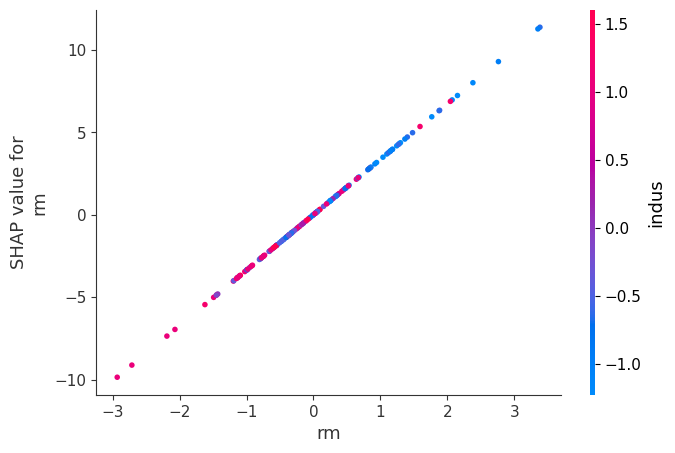

In [86]:
shap.dependence_plot("rm", svm_shap_values, X_test)


In [87]:
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 


In [88]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


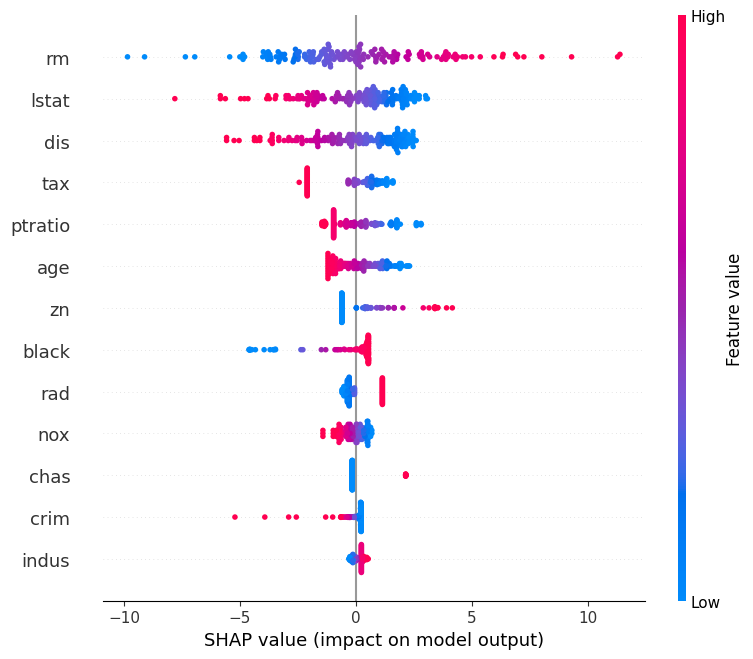

In [89]:
shap.summary_plot(svm_shap_values, X_test)
